In [1]:
!pip install xgboost lightgbm catboost scikit-optimize

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.environ['KAGGLE_USERNAME']="bhanapeeshan"
os.environ['KAGGLE_KEY']="646853511eaba7e71ae9a0d4d3c4af8a"
!kaggle datasets download -d erolmasimov/powerco

zsh:1: command not found: kaggle


In [4]:
data = pd.read_csv('/Users/ayushkapileshwar/Desktop/Datasets/archive 2/client_data (1).csv')

In [5]:
data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [7]:
# Convert Date Columns to Datetime
data['date_activ'] = pd.to_datetime(data['date_activ'])
data['date_end'] = pd.to_datetime(data['date_end'])
data['date_modif_prod'] = pd.to_datetime(data['date_modif_prod'])
data['date_renewal'] = pd.to_datetime(data['date_renewal'])

In [8]:
# Encode Categorical Variables
data = pd.get_dummies(data, columns=['channel_sales', 'has_gas', 'origin_up'], drop_first=True)

In [9]:
data['churn'].value_counts()

churn
0    13187
1     1419
Name: count, dtype: int64

In [10]:
from sklearn.preprocessing import MinMaxScaler
# Feature Scaling
scaler = MinMaxScaler()
data[['cons_12m', 'cons_gas_12m', 'imp_cons', 'forecast_cons_12m', 'net_margin', 'pow_max']] = scaler.fit_transform(data[['cons_12m', 'cons_gas_12m', 'imp_cons', 'forecast_cons_12m', 'net_margin', 'pow_max']])

In [11]:
from sklearn.model_selection import train_test_split

data = data.drop(['id'], axis=1)

data['days_since_activation'] = (pd.Timestamp.now() - data['date_activ']).dt.days
data['days_until_renewal'] = (data['date_renewal'] - pd.Timestamp.now()).dt.days

data = data.drop(['date_activ', 'date_end', 'date_modif_prod', 'date_renewal'], axis=1)

X = data.drop(['churn'], axis=1)
y = data['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
# Split Data into Features and Target
X = data.drop(['churn'], axis=1)
y = data['churn']

In [13]:
print("Current Column Names:")
print(data.columns)

Current Column Names:
Index(['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'churn',
       'channel_sales_epumfxlbckeskwekxbiuasklxalciiuu',
       'channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci',
       'channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa',
       'channel_sales_foosdfpfkusacimwkcsosbicdxkicaua',
       'channel_sales_lmkebamcaaclubfxadlmueccxoimlema',
       'channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds',
       'channel_sales_usilxuppasemubllopkaafesmlibmsdf', 'has_gas_t',
       'origin_up_ewxeelcelemmiwuafmddpobolfuxioce',
       'origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'origin_up_ldkssxwpmemidmecebumciepifcamkci',

SMOTE

In [14]:
from imblearn.over_sampling import SMOTE
# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Perform SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Old Data Shape: ", X.shape)
print("New Data Shape: ", X_resampled.shape)


num_synthetic_samples = X_resampled.shape[0] - X.shape[0]
print("Number of synthetic samples generated:", num_synthetic_samples)

Old Data Shape:  (14606, 32)
New Data Shape:  (26374, 32)
Number of synthetic samples generated: 11768


In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc, average_precision_score
from sklearn.model_selection import cross_val_score

#Importing Scikit Optimize library as skopt for performing Bayesian Search with K Fold Cross Validation

from skopt import BayesSearchCV
from skopt.space import Real, Integer

In [16]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

TRAINING


XGB Normal


In [17]:
from xgboost import XGBClassifier

# Define the model
xgb_model = XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

print(f"XGBoost Model:")
print(f"Accuracy: {accuracy_xgb}")
print(f"Confusion Matrix:\n{conf_matrix_xgb}")
print(f"Classification Report:\n{classification_rep_xgb}")

XGBoost Model:
Accuracy: 0.9099931553730322
Confusion Matrix:
[[2613   25]
 [ 238   46]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2638
           1       0.65      0.16      0.26       284

    accuracy                           0.91      2922
   macro avg       0.78      0.58      0.61      2922
weighted avg       0.89      0.91      0.88      2922



XGB SMOTE


In [18]:
xgb_smote = XGBClassifier(random_state=42)

xgb_smote.fit(X_train_smote, y_train_smote)

y_pred_xgb_smote = xgb_smote.predict(X_test_smote)

accuracy_xgb_smote = accuracy_score(y_test_smote, y_pred_xgb_smote)
conf_matrix_xgb_smote = confusion_matrix(y_test_smote, y_pred_xgb_smote)
classification_rep_xgb_smote = classification_report(y_test_smote, y_pred_xgb_smote)

print(f"XGBoost Model:")
print(f"Accuracy: {accuracy_xgb_smote}")
print(f"Confusion Matrix:\n{conf_matrix_xgb_smote}")
print(f"Classification Report:\n{classification_rep_xgb_smote}")

XGBoost Model:
Accuracy: 0.9397156398104265
Confusion Matrix:
[[2551   88]
 [ 230 2406]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2639
           1       0.96      0.91      0.94      2636

    accuracy                           0.94      5275
   macro avg       0.94      0.94      0.94      5275
weighted avg       0.94      0.94      0.94      5275



In [19]:
# Define classifier
xgb = XGBClassifier(random_state=42)

# Define search space for hyperparameters
param_space = {
    'learning_rate': Real(0.01, 1.0, 'log-uniform'),
    'n_estimators': Integer(50, 1000),
    'max_depth': Integer(1, 10),
    'subsample': Real(0.5, 1.0, 'uniform'),
    'colsample_bytree': Real(0.5, 1.0, 'uniform'),
}

# Perform Bayesian Optimization with cross-validation
bayes_search = BayesSearchCV(
    xgb, param_space, n_iter=50, cv=5, n_jobs=-1, scoring='accuracy', random_state=42
)

# Fit the model
bayes_search.fit(X_train_smote, y_train_smote)

# Get the best scores and parameters
print("Best Score:", bayes_search.best_score_)
print("Best Params:", bayes_search.best_params_)

y_pred_xgb_smote = bayes_search.predict(X_test_smote)

accuracy_xgb_smote = accuracy_score(y_test_smote, y_pred_xgb_smote)
conf_matrix_xgb_smote = confusion_matrix(y_test_smote, y_pred_xgb_smote)
classification_rep_xgb_smote = classification_report(y_test_smote, y_pred_xgb_smote)

print(f"XGBoost Model:")
print(f"Accuracy: {accuracy_xgb_smote}")
print(f"Confusion Matrix:\n{conf_matrix_xgb_smote}")
print(f"Classification Report:\n{classification_rep_xgb_smote}")

Best Score: 0.947533332060224
Best Params: OrderedDict([('colsample_bytree', 1.0), ('learning_rate', 0.06855868192736812), ('max_depth', 10), ('n_estimators', 448), ('subsample', 1.0)])
XGBoost Model:
Accuracy: 0.953175355450237
Confusion Matrix:
[[2571   68]
 [ 179 2457]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2639
           1       0.97      0.93      0.95      2636

    accuracy                           0.95      5275
   macro avg       0.95      0.95      0.95      5275
weighted avg       0.95      0.95      0.95      5275



LGB


In [20]:
from lightgbm import LGBMClassifier

# Define the LightGBM model
lgbm_model = LGBMClassifier(random_state=42)

# Train the LightGBM model
lgbm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluate the LightGBM model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
classification_rep_lgbm = classification_report(y_test, y_pred_lgbm)

print(f"LightGBM Model:")
print(f"Accuracy: {accuracy_lgbm}")
print(f"Confusion Matrix:\n{conf_matrix_lgbm}")
print(f"Classification Report:\n{classification_rep_lgbm}")

[LightGBM] [Info] Number of positive: 1135, number of negative: 10549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3755
[LightGBM] [Info] Number of data points in the train set: 11684, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.097141 -> initscore=-2.229398
[LightGBM] [Info] Start training from score -2.229398
LightGBM Model:
Accuracy: 0.9093086926762491
Confusion Matrix:
[[2624   14]
 [ 251   33]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2638
           1       0.70      0.12      0.20       284

    accuracy                           0.91      2922
   macro avg       0.81      0.56      0.58      2922
weighted avg       0.89      0.91      0.88      2922



In [21]:
lgbm_smote = LGBMClassifier(random_state=42)

lgbm_smote.fit(X_train_smote, y_train_smote)

y_pred_lgbm_smote = lgbm_smote.predict(X_test_smote)

accuracy_lgbm_smote = accuracy_score(y_test_smote, y_pred_lgbm_smote)
conf_matrix_lgbm_smote = confusion_matrix(y_test_smote, y_pred_lgbm_smote)
classification_rep_lgbm_smote = classification_report(y_test_smote, y_pred_lgbm_smote)

print(f"LightGBM Model:")
print(f"Accuracy: {accuracy_lgbm_smote}")
print(f"Confusion Matrix:\n{conf_matrix_lgbm_smote}")
print(f"Classification Report:\n{classification_rep_lgbm_smote}")

[LightGBM] [Info] Number of positive: 10551, number of negative: 10548
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4356
[LightGBM] [Info] Number of data points in the train set: 21099, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500071 -> initscore=0.000284
[LightGBM] [Info] Start training from score 0.000284
LightGBM Model:
Accuracy: 0.9287203791469194
Confusion Matrix:
[[2566   73]
 [ 303 2333]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2639
           1       0.97      0.89      0.93      2636

    accuracy                           0.93      5275
   macro avg       0.93      0.93      0.93      5275
weighted avg       0.93      0.93      0.93      5275



In [22]:
lgbm = LGBMClassifier(random_state=42)

param_space = {
    'learning_rate': Real(0.01, 1.0, 'log-uniform'),
    'n_estimators': Integer(50, 1000),
    'max_depth': Integer(1, 10),
    'subsample': Real(0.5, 1.0, 'uniform'),
    'colsample_bytree': Real(0.5, 1.0, 'uniform'),
}

bayes_search = BayesSearchCV(
    lgbm, param_space, n_iter=50, cv=5, n_jobs=-1, scoring='accuracy', random_state=42
)

bayes_search.fit(X_train_smote, y_train_smote)

print("Best Score:", bayes_search.best_score_)
print("Best Params:", bayes_search.best_params_)

y_pred_lgbm_smote = bayes_search.predict(X_test_smote)


accuracy_lgbm_smote = accuracy_score(y_test_smote, y_pred_lgbm_smote)
conf_matrix_lgbm_smote = confusion_matrix(y_test_smote, y_pred_lgbm_smote)
classification_rep_lgbm_smote = classification_report(y_test_smote, y_pred_lgbm_smote)

print(f"LightGBM Model:")
print(f"Accuracy: {accuracy_lgbm_smote}")
print(f"Confusion Matrix:\n{conf_matrix_lgbm_smote}")
print(f"Classification Report:\n{classification_rep_lgbm_smote}")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8440, number of negative: 8439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4355
[LightGBM] [Info] Number of data points in the train set: 16879, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500030 -> initscore=0.000118
[LightGBM] [Info] Start training from score 0.000118
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8441, number of ne

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8441, number of negative: 8438
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4359
[LightGBM] [Info] Number of data points in the train set: 16879, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500089 -> initscore=0.000355
[LightGBM] [Info] Start training from score 0.000355
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8440, number of ne

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8441, number of negative: 8439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4355
[LightGBM] [Info] Number of data points in the train set: 16880, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500059 -> initscore=0.000237
[LightGBM] [Info] Start training from score 0.000237
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8441, number of ne

[LightGBM] [Info] Number of positive: 8441, number of negative: 8438
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4357
[LightGBM] [Info] Number of data points in the train set: 16879, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500089 -> initscore=0.000355
[LightGBM] [Info] Start training from score 0.000355
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Info] Number of positive: 8441, number of negative: 8438
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008583 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4359
[LightGBM] [Info] Number of data points in the train set: 16879, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500089 -> initscore=0.000355
[LightGBM] [Info] Start training from score 0.000355
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8441, number of negative: 8438
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4357
[LightGBM] [Info] Number of data points in the train set: 16879, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500089 -> initscore=0.000355
[LightGBM] [Info] Start training from score 0.000355
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8441, number of ne

[LightGBM] [Info] Number of positive: 8441, number of negative: 8438
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005841 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4359
[LightGBM] [Info] Number of data points in the train set: 16879, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500089 -> initscore=0.000355
[LightGBM] [Info] Start training from score 0.000355
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Info] Number of positive: 8441, number of negative: 8439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4355
[LightGBM] [Info] Number of data points in the train set: 16880, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500059 -> initscore=0.000237
[LightGBM] [Info] Start training from score 0.000237
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^ma

[LightGBM] [Info] Number of positive: 8441, number of negative: 8438
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4357
[LightGBM] [Info] Number of data points in the train set: 16879, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500089 -> initscore=0.000355
[LightGBM] [Info] Start training from score 0.000355
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 8441, number of negative: 8438
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011359 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4356
[LightGBM] [Info] Number of data points in the train set: 16879, number of used features: 27
[LightGBM] [I

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8441, number of negative: 8438
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4356
[LightGBM] [Info] Number of data points in the train set: 16879, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500089 -> initscore=0.000355
[LightGBM] [Info] Start training from score 0.000355
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn'

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8441, number of negative: 8438
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4359
[LightGBM] [Info] Number of data points in the train set: 16879, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500089 -> initscore=0.000355
[LightGBM] [Info] Start training from score 0.000355
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4355
[LightGBM] [Info] Number of data points in the train set: 16879, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500030 -> initscore=0.000118
[LightGBM] [Info] Start training from score 0.000118
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explici

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth >

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 8441, number of negative: 8438
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007890 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4359
[LightGBM] [Info] Number of data points in the train set: 16879, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500089 -> initscore=0.000355
[LightGBM] [Info] Start training from score 0.000355
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8441, number of negative: 8438
[LightGBM] [Info] Auto-choosing col-wise multi-thre

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4356
[LightGBM] [Info] Number of data points in the train set: 16879, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500089 -> initscore=0.000355
[LightGBM] [Info] Start training from score 0.000355
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8440, number of negative: 8439
[LightGBM] [Info] Auto-choosing row-wise multi-threading

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8441, number of negative: 8439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4355
[LightGBM] [Info] Number of data points in the train set: 16880, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500059 -> initscore=0.000237
[LightGBM] [Info] Start training from score 0.000237
[LightGBM] [Warning] Accuracy may be bad since you didn'

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8441, number of negative: 8439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4355
[LightGBM] [Info] Number of data points in the train set: 16880, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500059 -> initscore=0.000237
[LightGBM] [Info] Start training from score 0.000237
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn'

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8441, number of negative: 8439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4355
[LightGBM] [Info] Number of data points in the train set: 16880, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500059 -> initscore=0.000237
[LightGBM] [Info] Start training from score 0.000237
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be

[LightGBM] [Info] Number of positive: 8441, number of negative: 8438
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4356
[LightGBM] [Info] Number of data points in the train set: 16879, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500089 -> initscore=0.000355
[LightGBM] [Info] Start training from score 0.000355
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8441, number of negative: 8439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010364 seconds.
You can set `

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4356
[LightGBM] [Info] Number of data points in the train set: 16879, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500089 -> initscore=0.000355
[LightGBM] [Info] Start training from score 0.000355
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8441, number of negative: 8439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

[LightGBM] [Info] Total Bins 4356
[LightGBM] [Info] Number of data points in the train set: 16879, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500089 -> initscore=0.000355
[LightGBM] [Info] Start training from score 0.000355
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth >

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad sinc

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8440, number of negative: 8439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4355
[LightGBM] [Info] Number of data points in the train set

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8441, number of negative: 8439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4355
[LightGBM] [Info] Number of data points in the train set: 16880, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500059 -> initscore=0.000237
[LightGBM] [Info] Start training from score 0.000237
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn'

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8441, number of negative: 8439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4355
[LightGBM] [Info] Number of data points in the train set: 16880, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500059 -> initscore=0.000237
[LightGBM] [Info] Start training from score 0.000237
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn'

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf[LightGBM] [Info] Start training from score 0.000355
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.125426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4356
[LightGBM] [Info] Number of data points in the train set: 16879, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500089 -> initscore=0.000355
[LightGBM] [Info] Start training from score 0.000355
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8441, number


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 10551, number of negative: 10548
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4356
[LightGBM] [Info] Number of data points in the train set: 21099, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500071 -> initscore=0.000284
[LightGBM] [Info] Start training from score 0.000284
Best Score: 0.9471542188407442
Best Params: OrderedDict([('colsample_bytree', 1.0), ('learning_rate', 0.2683555399899615), ('max_depth', 10), ('n_estimators', 1000), ('subsample', 0.5)

Catboost

In [23]:
from catboost import CatBoostClassifier
# Define the CatBoost model with specified parameters
catboost_model = CatBoostClassifier(random_state=42, verbose=100)

# Train the CatBoost model
catboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_catboost = catboost_model.predict(X_test)

# Evaluate the CatBoost model
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
conf_matrix_catboost = confusion_matrix(y_test, y_pred_catboost)
classification_rep_catboost = classification_report(y_test, y_pred_catboost)

print(f"CatBoost Model:")
print(f"Accuracy: {accuracy_catboost}")
print(f"Confusion Matrix:\n{conf_matrix_catboost}")
print(f"Classification Report:\n{classification_rep_catboost}")

Learning rate set to 0.02943
0:	learn: 0.6656484	total: 60.5ms	remaining: 1m
100:	learn: 0.2926454	total: 380ms	remaining: 3.38s
200:	learn: 0.2755387	total: 678ms	remaining: 2.69s
300:	learn: 0.2607300	total: 978ms	remaining: 2.27s
400:	learn: 0.2464709	total: 1.27s	remaining: 1.9s
500:	learn: 0.2327674	total: 1.57s	remaining: 1.57s
600:	learn: 0.2212459	total: 1.88s	remaining: 1.25s
700:	learn: 0.2113833	total: 2.18s	remaining: 928ms
800:	learn: 0.2023980	total: 2.48s	remaining: 616ms
900:	learn: 0.1941741	total: 2.78s	remaining: 305ms
999:	learn: 0.1867465	total: 3.08s	remaining: 0us
CatBoost Model:
Accuracy: 0.9075975359342916
Confusion Matrix:
[[2625   13]
 [ 257   27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2638
           1       0.68      0.10      0.17       284

    accuracy                           0.91      2922
   macro avg       0.79      0.55      0.56      2922
weighted avg       0.

In [24]:
catboost_smote = CatBoostClassifier(random_state=42, verbose=100)

catboost_smote.fit(X_train_smote, y_train_smote)

y_pred_catboost_smote = catboost_smote.predict(X_test_smote)

accuracy_catboost_smote = accuracy_score(y_test_smote, y_pred_catboost_smote)
conf_matrix_catboost_smote = confusion_matrix(y_test_smote, y_pred_catboost_smote)
classification_rep_catboost_smote = classification_report(y_test_smote, y_pred_catboost_smote)

print(f"CatBoost Model:")
print(f"Accuracy: {accuracy_catboost_smote}")
print(f"Confusion Matrix:\n{conf_matrix_catboost_smote}")
print(f"Classification Report:\n{classification_rep_catboost_smote}")

Learning rate set to 0.037879
0:	learn: 0.6673784	total: 4.3ms	remaining: 4.3s
100:	learn: 0.3405658	total: 392ms	remaining: 3.48s
200:	learn: 0.2910046	total: 778ms	remaining: 3.09s
300:	learn: 0.2569717	total: 1.17s	remaining: 2.71s
400:	learn: 0.2299229	total: 1.55s	remaining: 2.32s
500:	learn: 0.2100308	total: 1.94s	remaining: 1.93s
600:	learn: 0.1940397	total: 2.33s	remaining: 1.54s
700:	learn: 0.1812611	total: 2.71s	remaining: 1.16s
800:	learn: 0.1697583	total: 3.1s	remaining: 770ms
900:	learn: 0.1598432	total: 3.48s	remaining: 383ms
999:	learn: 0.1509518	total: 3.86s	remaining: 0us
CatBoost Model:
Accuracy: 0.9366824644549763
Confusion Matrix:
[[2577   62]
 [ 272 2364]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2639
           1       0.97      0.90      0.93      2636

    accuracy                           0.94      5275
   macro avg       0.94      0.94      0.94      5275
weighted avg       

In [25]:
catboost = CatBoostClassifier(random_state=42, verbose=100)

# Define search space for hyperparameters
param_space = {
    'learning_rate': Real(0.01, 1.0, 'log-uniform'),
    'n_estimators': Integer(50, 1000),
    'max_depth': Integer(1, 10),
    'subsample': Real(0.5, 1.0, 'uniform'),
    'colsample_bylevel': Real(0.5, 1.0, 'uniform'),
}

# Perform Bayesian Optimization with cross-validation
bayes_search = BayesSearchCV(
    catboost, param_space, n_iter=50, cv=5, n_jobs=-1, scoring='accuracy', random_state=42
)

# Fit the model
bayes_search.fit(X_train_smote, y_train_smote)

# Get the best scores and parameters
print("Best Score:", bayes_search.best_score_)
print("Best Params:", bayes_search.best_params_)

y_pred_cb_smote = bayes_search.predict(X_test_smote)

accuracy_cb_smote = accuracy_score(y_test_smote, y_pred_cb_smote)
conf_matrix_cb_smote = confusion_matrix(y_test_smote, y_pred_cb_smote)
classification_rep_cb_smote = classification_report(y_test_smote, y_pred_cb_smote)

print(f"CatBoost Model:")
print(f"Accuracy: {accuracy_cb_smote}")
print(f"Confusion Matrix:\n{conf_matrix_cb_smote}")
print(f"Classification Report:\n{classification_rep_cb_smote}")

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

0:	learn: 0.6073957	total: 40.3ms	remaining: 29.8s
100:	learn: 0.1428195	total: 1.72s	remaining: 10.9s
200:	learn: 0.0753578	total: 3.34s	remaining: 8.94s
300:	learn: 0.0463183	total: 4.95s	remaining: 7.2s
400:	learn: 0.0309238	total: 6.53s	remaining: 5.5s
500:	learn: 0.0218176	total: 8.17s	remaining: 3.88s
600:	learn: 0.0161579	total: 9.77s	remaining: 2.24s
700:	learn: 0.0124854	total: 11.4s	remaining: 619ms
738:	learn: 0.0114374	total: 12s	remaining: 0us
Best Score: 0.9492869427291794
Best Params: OrderedDict([('colsample_bylevel', 0.5), ('learning_rate', 0.13427596121773516), ('max_depth', 10), ('n_estimators', 739), ('subsample', 1.0)])
CatBoost Model:
Accuracy: 0.953175355450237
Confusion Matrix:
[[2559   80]
 [ 167 2469]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2639
           1       0.97      0.94      0.95      2636

    accuracy                           0.95      5275
   macro avg       0.

In [26]:
# Accuracy of XGBoost without SMOTE
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy of XGBoost without SMOTE:", accuracy_xgb)

# Accuracy of XGBoost with SMOTE
accuracy_xgb_smote = accuracy_score(y_test_smote, y_pred_xgb_smote)
print("Accuracy of XGBoost with SMOTE:", accuracy_xgb_smote)

# Accuracy of LightGBM without SMOTE
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print("Accuracy of LightGBM without SMOTE:", accuracy_lgbm)

# Accuracy of LightGBM with SMOTE
accuracy_lgbm_smote = accuracy_score(y_test_smote, y_pred_lgbm_smote)
print("Accuracy of LightGBM with SMOTE:", accuracy_lgbm_smote)

# Accuracy of CatBoost without SMOTE
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print("Accuracy of CatBoost without SMOTE:", accuracy_catboost)

# Accuracy of CatBoost with SMOTE
accuracy_catboost_smote = accuracy_score(y_test_smote, y_pred_catboost_smote)
print("Accuracy of CatBoost with SMOTE:", accuracy_catboost_smote)


Accuracy of XGBoost without SMOTE: 0.9099931553730322
Accuracy of XGBoost with SMOTE: 0.953175355450237
Accuracy of LightGBM without SMOTE: 0.9093086926762491
Accuracy of LightGBM with SMOTE: 0.9516587677725118
Accuracy of CatBoost without SMOTE: 0.9075975359342916
Accuracy of CatBoost with SMOTE: 0.9366824644549763


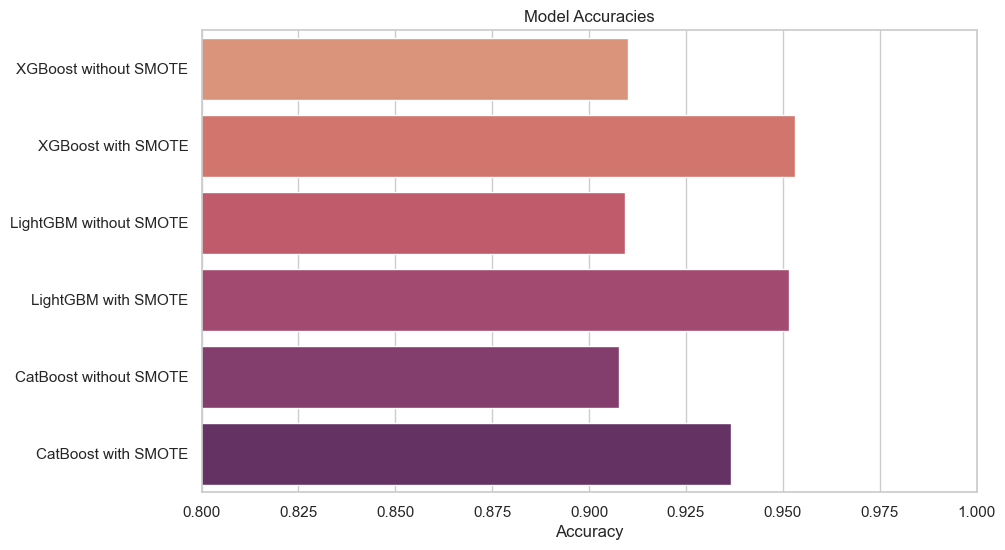

In [27]:
import matplotlib.pyplot as plt

# Define the models and their accuracies
models = ["XGBoost without SMOTE", "XGBoost with SMOTE",
          "LightGBM without SMOTE", "LightGBM with SMOTE",
          "CatBoost without SMOTE", "CatBoost with SMOTE"]
accuracies = [accuracy_xgb, accuracy_xgb_smote,
              accuracy_lgbm, accuracy_lgbm_smote,
              accuracy_catboost, accuracy_catboost_smote]

# Create a bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracies, y=models, palette="flare")
plt.xlabel("Accuracy")
plt.title("Model Accuracies")
plt.xlim(0.8, 1.0)
plt.show()

In [28]:
from sklearn.metrics import precision_score

# Define precision for each model
precision_xgb = precision_score(y_test, y_pred_xgb)
precision_xgb_smote = precision_score(y_test_smote, y_pred_xgb_smote)
precision_lgbm = precision_score(y_test, y_pred_lgbm)
precision_lgbm_smote = precision_score(y_test_smote, y_pred_lgbm_smote)
precision_catboost = precision_score(y_test, y_pred_catboost)
precision_catboost_smote = precision_score(y_test_smote, y_pred_catboost_smote)

# Print precision for each model
print("Precision for XGBoost without SMOTE:", precision_xgb)
print("Precision for XGBoost with SMOTE:", precision_xgb_smote)
print("Precision for LightGBM without SMOTE:", precision_lgbm)
print("Precision for LightGBM with SMOTE:", precision_lgbm_smote)
print("Precision for CatBoost without SMOTE:", precision_catboost)
print("Precision for CatBoost with SMOTE:", precision_catboost_smote)

Precision for XGBoost without SMOTE: 0.647887323943662
Precision for XGBoost with SMOTE: 0.973069306930693
Precision for LightGBM without SMOTE: 0.7021276595744681
Precision for LightGBM with SMOTE: 0.9729837107667858
Precision for CatBoost without SMOTE: 0.675
Precision for CatBoost with SMOTE: 0.9744435284418796


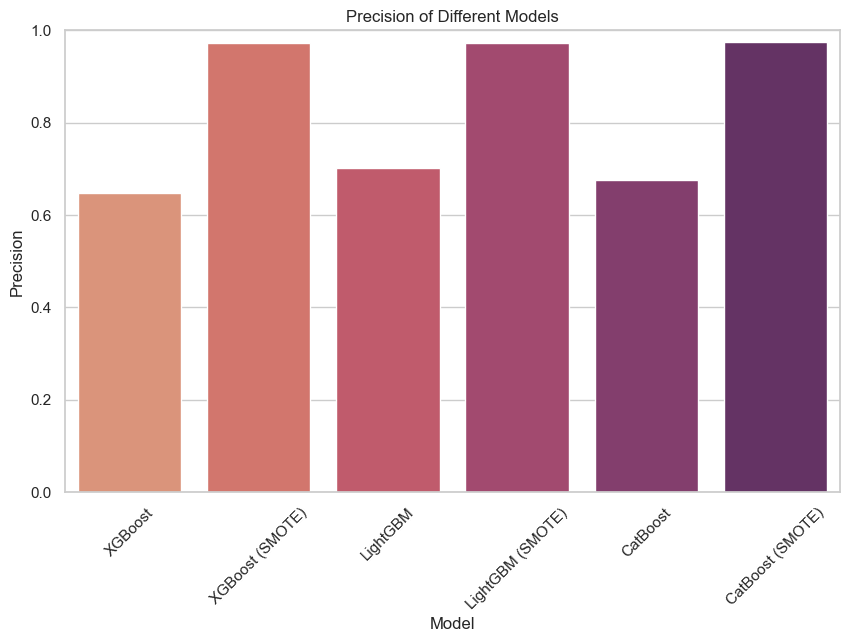

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define model names and their corresponding precisions
models = ['XGBoost', 'XGBoost (SMOTE)', 'LightGBM', 'LightGBM (SMOTE)', 'CatBoost', 'CatBoost (SMOTE)']
precisions = [precision_xgb, precision_xgb_smote, precision_lgbm, precision_lgbm_smote, precision_catboost, precision_catboost_smote]

# Plot precisions
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=precisions, palette='flare')
plt.title('Precision of Different Models')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.ylim(0, 1)  # Set y-axis limits
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [30]:
from sklearn.metrics import recall_score

# Calculate recall scores for each model
recall_xgb = recall_score(y_test, y_pred_xgb)
recall_xgb_smote = recall_score(y_test_smote, y_pred_xgb_smote)
recall_lgbm = recall_score(y_test, y_pred_lgbm)
recall_lgbm_smote = recall_score(y_test_smote, y_pred_lgbm_smote)
recall_catboost = recall_score(y_test, y_pred_catboost)
recall_catboost_smote = recall_score(y_test_smote, y_pred_catboost_smote)

# Print recall scores
print("Recall Scores:")
print(f"XGBoost: {recall_xgb}")
print(f"XGBoost (SMOTE): {recall_xgb_smote}")
print(f"LightGBM: {recall_lgbm}")
print(f"LightGBM (SMOTE): {recall_lgbm_smote}")
print(f"CatBoost: {recall_catboost}")
print(f"CatBoost (SMOTE): {recall_catboost_smote}")


Recall Scores:
XGBoost: 0.1619718309859155
XGBoost (SMOTE): 0.9320940819423369
LightGBM: 0.11619718309859155
LightGBM (SMOTE): 0.9290591805766313
CatBoost: 0.09507042253521127
CatBoost (SMOTE): 0.8968133535660091


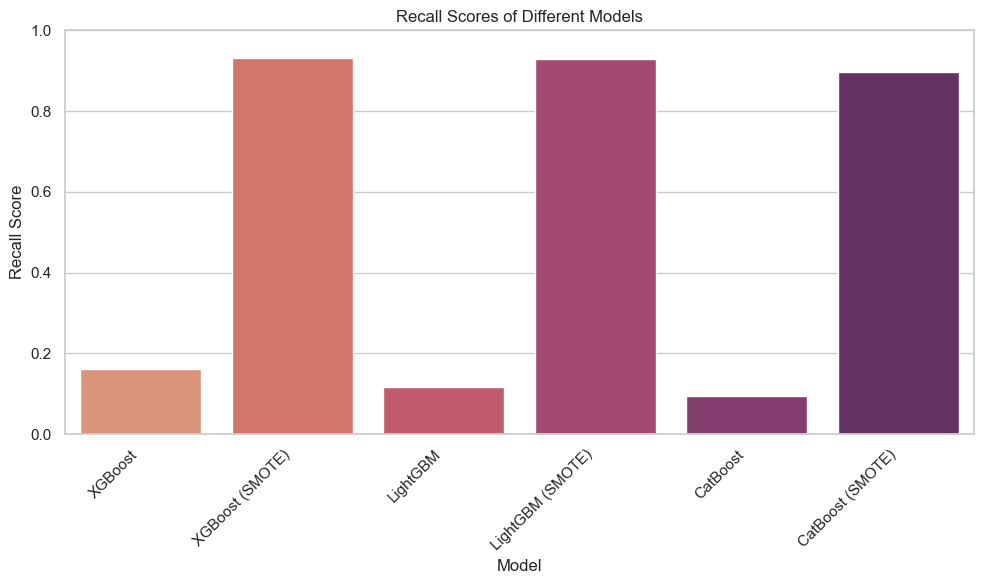

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define model names and recall scores
models = ['XGBoost', 'XGBoost (SMOTE)', 'LightGBM', 'LightGBM (SMOTE)', 'CatBoost', 'CatBoost (SMOTE)']
recall_scores = [recall_xgb, recall_xgb_smote, recall_lgbm, recall_lgbm_smote, recall_catboost, recall_catboost_smote]

# Plot recall scores
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=recall_scores, palette='flare')
plt.title('Recall Scores of Different Models')
plt.xlabel('Model')
plt.ylabel('Recall Score')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [32]:
# Calculate F1 scores for each model
f1_xgb = 2 * (precision_xgb * recall_xgb) / (precision_xgb + recall_xgb)
f1_xgb_smote = 2 * (precision_xgb_smote * recall_xgb_smote) / (precision_xgb_smote + recall_xgb_smote)
f1_lgbm = 2 * (precision_lgbm * recall_lgbm) / (precision_lgbm + recall_lgbm)
f1_lgbm_smote = 2 * (precision_lgbm_smote * recall_lgbm_smote) / (precision_lgbm_smote + recall_lgbm_smote)
f1_catboost = 2 * (precision_catboost * recall_catboost) / (precision_catboost + recall_catboost)
f1_catboost_smote = 2 * (precision_catboost_smote * recall_catboost_smote) / (precision_catboost_smote + recall_catboost_smote)

# Print F1 scores for each model
print("F1 Scores:")
print(f"XGBoost: {f1_xgb}")
print(f"XGBoost (SMOTE): {f1_xgb_smote}")
print(f"LightGBM: {f1_lgbm}")
print(f"LightGBM (SMOTE): {f1_lgbm_smote}")
print(f"CatBoost: {f1_catboost}")
print(f"CatBoost (SMOTE): {f1_catboost_smote}")


F1 Scores:
XGBoost: 0.2591549295774648
XGBoost (SMOTE): 0.9521410579345089
LightGBM: 0.19939577039274925
LightGBM (SMOTE): 0.9505142635358044
CatBoost: 0.16666666666666666
CatBoost (SMOTE): 0.9340181746345319


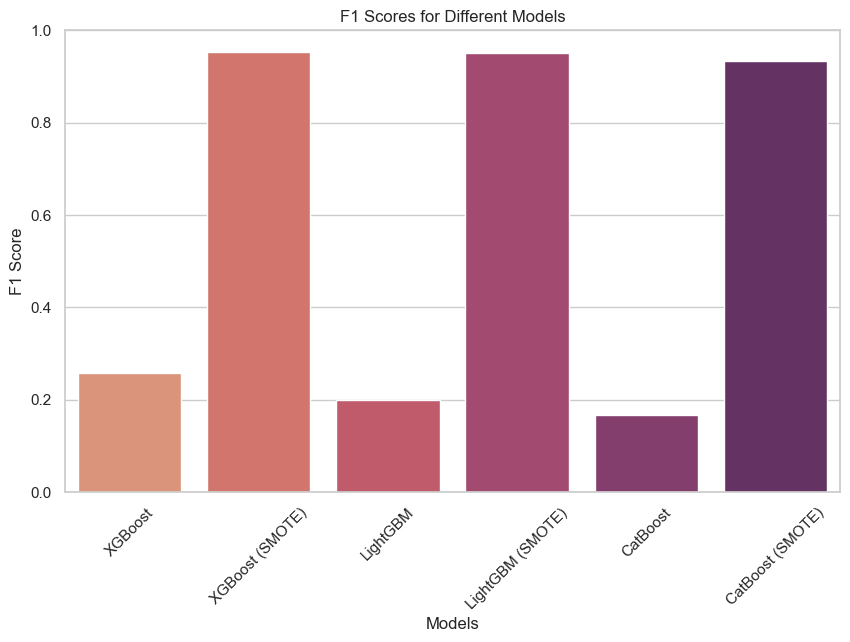

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# F1 scores for each model
f1_scores = [f1_xgb, f1_xgb_smote, f1_lgbm, f1_lgbm_smote, f1_catboost, f1_catboost_smote]
models = ['XGBoost', 'XGBoost (SMOTE)', 'LightGBM', 'LightGBM (SMOTE)', 'CatBoost', 'CatBoost (SMOTE)']

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=f1_scores, palette='flare')
plt.title('F1 Scores for Different Models')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.ylim(0.0, 1.0)  # Set y-axis limit from 0 to 1
plt.show()


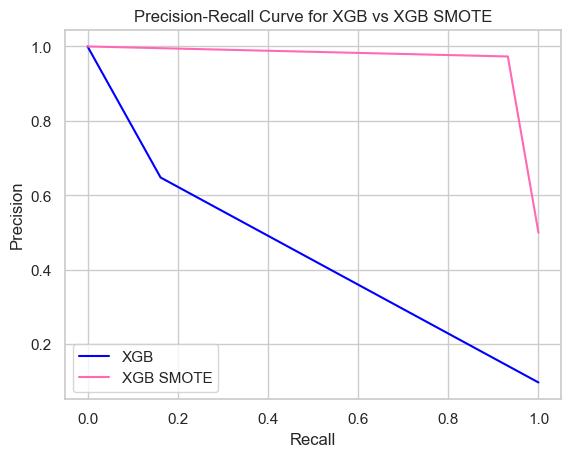

In [34]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision and recall for XGB
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_xgb)

# Calculate precision and recall for XGB SMOTE
precision_xgb_smote, recall_xgb_smote, _ = precision_recall_curve(y_test_smote, y_pred_xgb_smote)

# Plot Precision-Recall curve for XGB
plt.plot(recall_xgb, precision_xgb, label='XGB', color='blue')

# Plot Precision-Recall curve for XGB SMOTE
plt.plot(recall_xgb_smote, precision_xgb_smote, label='XGB SMOTE', color='hotpink')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for XGB vs XGB SMOTE')
plt.legend()
plt.grid(True)
plt.show()


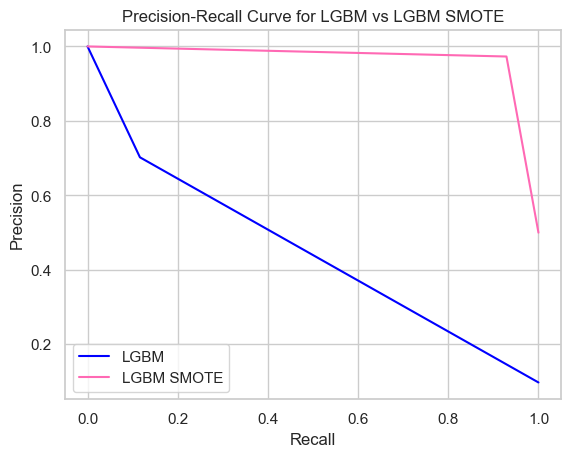

In [35]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision and recall for LGBM
precision_lgbm, recall_lgbm, _ = precision_recall_curve(y_test, y_pred_lgbm)

# Calculate precision and recall for LGBM SMOTE
precision_lgbm_smote, recall_lgbm_smote, _ = precision_recall_curve(y_test_smote, y_pred_lgbm_smote)

# Plot Precision-Recall curve for LGBM
plt.plot(recall_lgbm, precision_lgbm, label='LGBM', color='blue')

# Plot Precision-Recall curve for LGBM SMOTE
plt.plot(recall_lgbm_smote, precision_lgbm_smote, label='LGBM SMOTE', color='hotpink')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for LGBM vs LGBM SMOTE')
plt.legend()
plt.grid(True)
plt.show()


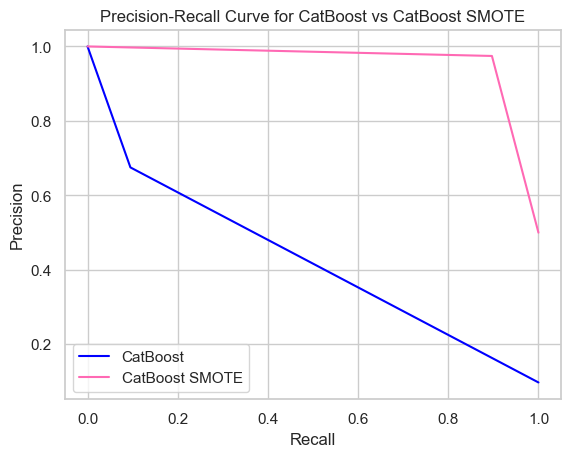

In [36]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision and recall for CatBoost
precision_catboost, recall_catboost, _ = precision_recall_curve(y_test, y_pred_catboost)

# Calculate precision and recall for CatBoost SMOTE
precision_catboost_smote, recall_catboost_smote, _ = precision_recall_curve(y_test_smote, y_pred_catboost_smote)

# Plot Precision-Recall curve for CatBoost
plt.plot(recall_catboost, precision_catboost, label='CatBoost', color='blue')

# Plot Precision-Recall curve for CatBoost SMOTE
plt.plot(recall_catboost_smote, precision_catboost_smote, label='CatBoost SMOTE', color='hotpink')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for CatBoost vs CatBoost SMOTE')
plt.legend()
plt.grid(True)
plt.show()



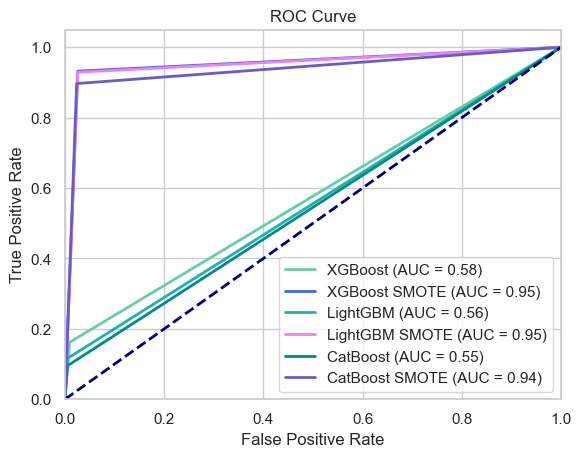

In [37]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

fpr_xgb_smote, tpr_xgb_smote, _ = roc_curve(y_test_smote, y_pred_xgb_smote)
roc_auc_xgb_smote = auc(fpr_xgb_smote, tpr_xgb_smote)

# Calculate ROC curve and AUC for LightGBM
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_pred_lgbm)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

fpr_lgbm_smote, tpr_lgbm_smote, _ = roc_curve(y_test_smote, y_pred_lgbm_smote)
roc_auc_lgbm_smote = auc(fpr_lgbm_smote, tpr_lgbm_smote)

# Calculate ROC curve and AUC for CatBoost
fpr_catboost, tpr_catboost, _ = roc_curve(y_test, y_pred_catboost)
roc_auc_catboost = auc(fpr_catboost, tpr_catboost)

fpr_catboost_smote, tpr_catboost_smote, _ = roc_curve(y_test_smote, y_pred_catboost_smote)
roc_auc_catboost_smote = auc(fpr_catboost_smote, tpr_catboost_smote)

# Plot ROC curve for XGBoost
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='mediumaquamarine', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)
plt.plot(fpr_xgb_smote, tpr_xgb_smote, color='royalblue', lw=2, label='XGBoost SMOTE (AUC = %0.2f)' % roc_auc_xgb_smote)

# Plot ROC curve for LightGBM
plt.plot(fpr_lgbm, tpr_lgbm, color='lightseagreen', lw=2, label='LightGBM (AUC = %0.2f)' % roc_auc_lgbm)
plt.plot(fpr_lgbm_smote, tpr_lgbm_smote, color='violet', lw=2, label='LightGBM SMOTE (AUC = %0.2f)' % roc_auc_lgbm_smote)

# Plot ROC curve for CatBoost
plt.plot(fpr_catboost, tpr_catboost, color='darkcyan', lw=2, label='CatBoost (AUC = %0.2f)' % roc_auc_catboost)
plt.plot(fpr_catboost_smote, tpr_catboost_smote, color='slateblue', lw=2, label='CatBoost SMOTE (AUC = %0.2f)' % roc_auc_catboost_smote)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


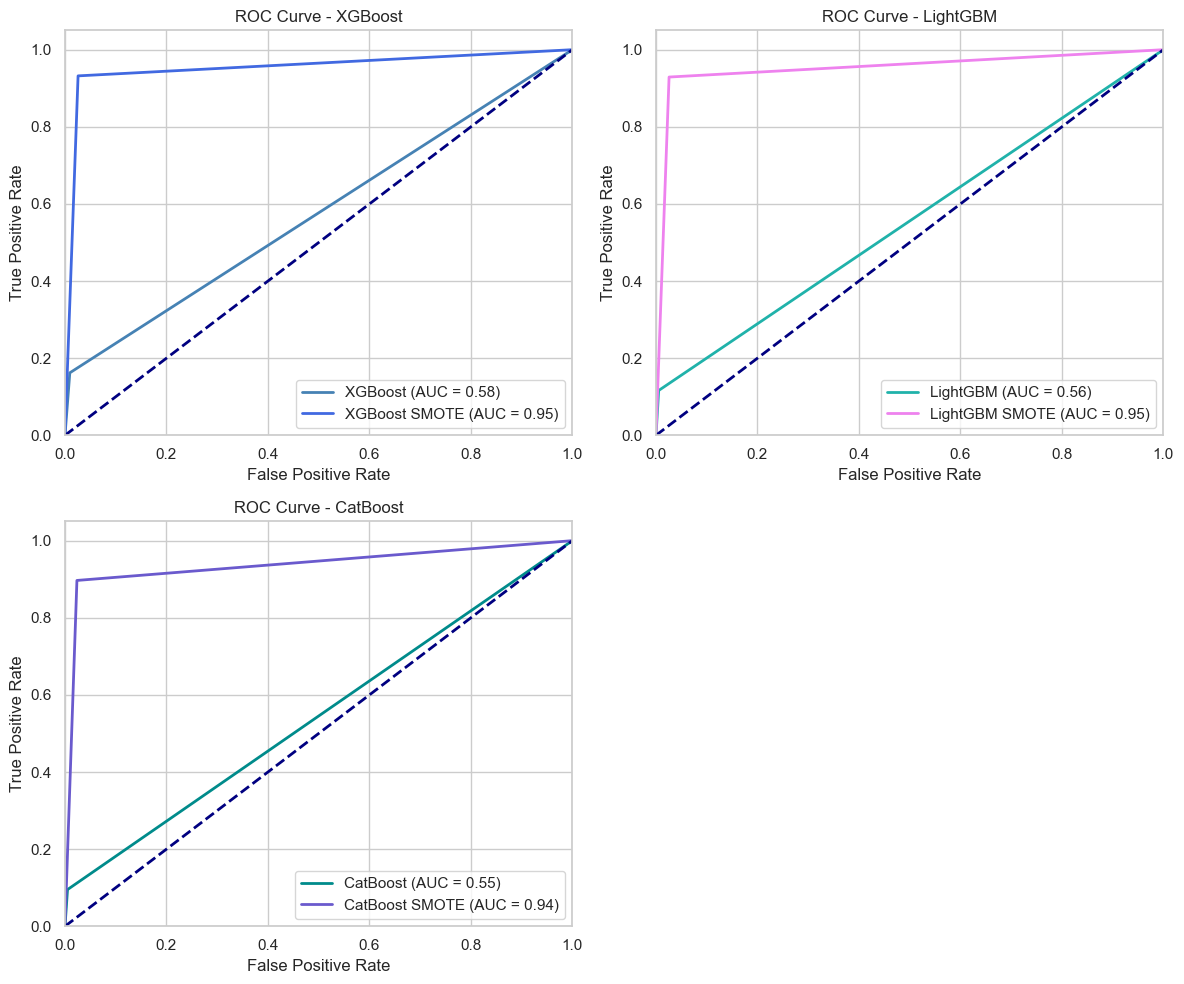

In [38]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot ROC curve for XGBoost
axes[0, 0].plot(fpr_xgb, tpr_xgb, color='steelblue', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)
axes[0, 0].plot(fpr_xgb_smote, tpr_xgb_smote, color='royalblue', lw=2, label='XGBoost SMOTE (AUC = %0.2f)' % roc_auc_xgb_smote)
axes[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0, 0].set_xlim([0.0, 1.0])
axes[0, 0].set_ylim([0.0, 1.05])
axes[0, 0].set_xlabel('False Positive Rate')
axes[0, 0].set_ylabel('True Positive Rate')
axes[0, 0].set_title('ROC Curve - XGBoost')
axes[0, 0].legend(loc="lower right")

# Plot ROC curve for LightGBM
axes[0, 1].plot(fpr_lgbm, tpr_lgbm, color='lightseagreen', lw=2, label='LightGBM (AUC = %0.2f)' % roc_auc_lgbm)
axes[0, 1].plot(fpr_lgbm_smote, tpr_lgbm_smote, color='violet', lw=2, label='LightGBM SMOTE (AUC = %0.2f)' % roc_auc_lgbm_smote)
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC Curve - LightGBM')
axes[0, 1].legend(loc="lower right")

# Plot ROC curve for CatBoost
axes[1, 0].plot(fpr_catboost, tpr_catboost, color='darkcyan', lw=2, label='CatBoost (AUC = %0.2f)' % roc_auc_catboost)
axes[1, 0].plot(fpr_catboost_smote, tpr_catboost_smote, color='slateblue', lw=2, label='CatBoost SMOTE (AUC = %0.2f)' % roc_auc_catboost_smote)
axes[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1, 0].set_xlim([0.0, 1.0])
axes[1, 0].set_ylim([0.0, 1.05])
axes[1, 0].set_xlabel('False Positive Rate')
axes[1, 0].set_ylabel('True Positive Rate')
axes[1, 0].set_title('ROC Curve - CatBoost')
axes[1, 0].legend(loc="lower right")

# Remove the empty subplot
fig.delaxes(axes[1, 1])

# Adjust layout
plt.tight_layout()

plt.show()


In [39]:
from sklearn.metrics import matthews_corrcoef

def calculate_mcc(y_true, y_pred):
    return matthews_corrcoef(y_true, y_pred)


In [40]:
mcc_xgb = calculate_mcc(y_test, y_pred_xgb)
mcc_xgb_smote = calculate_mcc(y_test_smote, y_pred_xgb_smote)
mcc_lgbm = calculate_mcc(y_test, y_pred_lgbm)
mcc_lgbm_smote = calculate_mcc(y_test_smote, y_pred_lgbm_smote)
mcc_catboost = calculate_mcc(y_test, y_pred_catboost)
mcc_catboost_smote = calculate_mcc(y_test_smote, y_pred_catboost_smote)


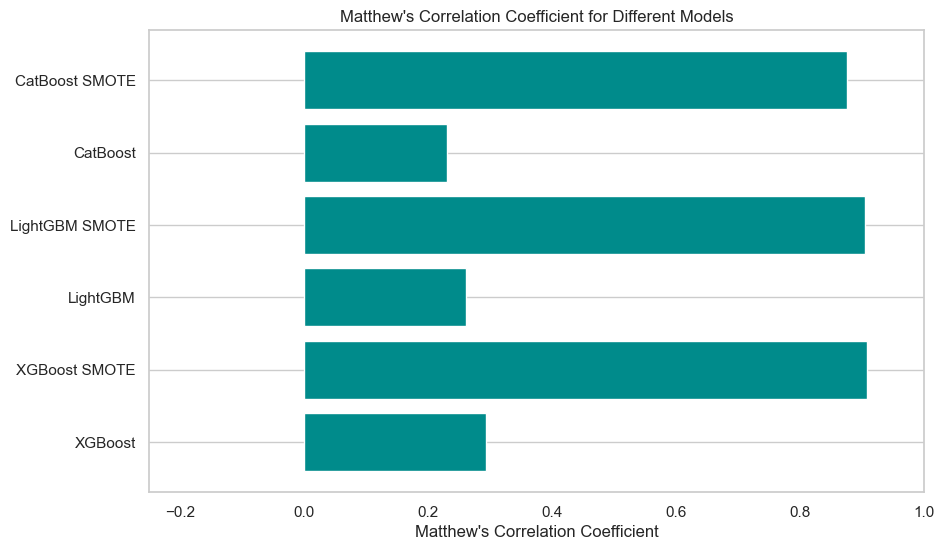

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
0:	learn: 0.5152831	total: 62.4ms	remaining: 59.5s
100:	learn: 0.1736685	total: 635ms	remaining: 5.36s
200:	learn: 0.1193880	total: 1.22s	remaining: 4.58s
300:	learn: 0.0873099	total: 1.8s	remaining: 3.9s
400:	learn: 0.0650312	total: 2.41s	remaining: 3.32s
500:	learn: 0.0493379	total: 2.99s	remaining: 2.7s
600:	learn: 0.0376247	total: 3.58s	remaining: 2.1s
700:	learn: 0.0295537	total: 4.17s	remaining: 1.5s
800:	learn: 0.0233797	total: 4.77s	remaining: 911ms
900:	learn: 0.0190058	total: 5.35s	remaining: 315ms
953:	learn: 0.0173653	total: 5.5s	remaining: 0us
0:	lear

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4355
[LightGBM] [Info] Number of data points in the train set: 16880, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500059 -> initscore=0.000237
[LightGBM] [Info] Start training from score 0.000237
0:	learn: 0.5031790	total: 101ms	remaining: 35.3s
100:	learn: 0.0931907	total: 2.58s	remaining: 6.35s
200:	learn: 0.0380865	total: 4.86s	remaining: 3.6s
300:	learn: 0.0202038	total: 7.12s	remaining: 1.16s
349:	learn: 0.0156478	total: 8.26s	remaining: 0us
0:	learn: 0.5193727	total: 9.48ms	remaining: 9.03s
100:	learn: 0.1749227	total: 582ms	remaining: 4.92s
200:	learn: 0.1211105	total: 1.16s	remaining: 4.33s
300:	learn: 0.0879702	total: 1.75s	remaining: 3.8s
400:	learn: 0.0667928	total: 2.33s	remaining: 3.22s
50

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

200:	learn: 0.1632656	total: 1.13s	remaining: 3.82s
300:	learn: 0.1309084	total: 1.7s	remaining: 3.27s
400:	learn: 0.1082291	total: 2.27s	remaining: 2.71s
500:	learn: 0.0909600	total: 2.88s	remaining: 2.18s
600:	learn: 0.0769557	total: 3.5s	remaining: 1.63s
700:	learn: 0.0656640	total: 4.05s	remaining: 1.04s
800:	learn: 0.0563687	total: 4.62s	remaining: 461ms
880:	learn: 0.0498569	total: 5.05s	remaining: 0us
0:	learn: 0.5171699	total: 6.98ms	remaining: 5.9s
100:	learn: 0.1329368	total: 657ms	remaining: 4.84s
200:	learn: 0.0757213	total: 1.29s	remaining: 4.15s
300:	learn: 0.0459956	total: 1.93s	remaining: 3.49s
400:	learn: 0.0293252	total: 2.55s	remaining: 2.83s
500:	learn: 0.0200306	total: 3.2s	remaining: 2.21s
600:	learn: 0.0144118	total: 3.83s	remaining: 1.56s
700:	learn: 0.0113055	total: 4.42s	remaining: 914ms
800:	learn: 0.0100354	total: 4.98s	remaining: 280ms
845:	learn: 0.0098756	total: 5.19s	remaining: 0us
0:	learn: 0.5540239	total: 43.5ms	remaining: 19.3s
100:	learn: 0.0980199	

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate Matthew's correlation coefficient for each model
mcc_values = [mcc_xgb, mcc_xgb_smote, mcc_lgbm, mcc_lgbm_smote, mcc_catboost, mcc_catboost_smote]

# Define model names
model_names = ['XGBoost', 'XGBoost SMOTE', 'LightGBM', 'LightGBM SMOTE', 'CatBoost', 'CatBoost SMOTE']

# Plot MCC values
plt.figure(figsize=(10, 6))
plt.barh(model_names, mcc_values, color='darkcyan')
plt.xlabel("Matthew's Correlation Coefficient")
plt.title("Matthew's Correlation Coefficient for Different Models")
plt.xlim(-0.25, 1)  # Adjust the limits according to the MCC range (-1 to 1)
plt.grid(axis='x')

plt.show()


In [42]:
# Calculate MCC values for each model
mcc_xgb = calculate_mcc(y_test, y_pred_xgb)
mcc_xgb_smote = calculate_mcc(y_test_smote, y_pred_xgb_smote)
mcc_lgbm = calculate_mcc(y_test, y_pred_lgbm)
mcc_lgbm_smote = calculate_mcc(y_test_smote, y_pred_lgbm_smote)
mcc_catboost = calculate_mcc(y_test, y_pred_catboost)
mcc_catboost_smote = calculate_mcc(y_test_smote, y_pred_catboost_smote)

# Print MCC values
print("Matthew's Correlation Coefficient (MCC) Values:")
print(f"XGBoost: {mcc_xgb}")
print(f"XGBoost SMOTE: {mcc_xgb_smote}")
print(f"LightGBM: {mcc_lgbm}")
print(f"LightGBM SMOTE: {mcc_lgbm_smote}")
print(f"CatBoost: {mcc_catboost}")
print(f"CatBoost SMOTE: {mcc_catboost_smote}")

Matthew's Correlation Coefficient (MCC) Values:
XGBoost: 0.2933757801577702
XGBoost SMOTE: 0.9071521959397032
LightGBM: 0.26110886308675935
LightGBM SMOTE: 0.9042359064694542
CatBoost: 0.22979941774722695
CatBoost SMOTE: 0.8761409620995388


In [43]:
# Calculate TPR and FPR for each model
tpr_xgb = conf_matrix_xgb[1, 1] / (conf_matrix_xgb[1, 1] + conf_matrix_xgb[1, 0])
fpr_xgb = conf_matrix_xgb[0, 1] / (conf_matrix_xgb[0, 1] + conf_matrix_xgb[0, 0])

tpr_xgb_smote = conf_matrix_xgb_smote[1, 1] / (conf_matrix_xgb_smote[1, 1] + conf_matrix_xgb_smote[1, 0])
fpr_xgb_smote = conf_matrix_xgb_smote[0, 1] / (conf_matrix_xgb_smote[0, 1] + conf_matrix_xgb_smote[0, 0])

tpr_lgbm = conf_matrix_lgbm[1, 1] / (conf_matrix_lgbm[1, 1] + conf_matrix_lgbm[1, 0])
fpr_lgbm = conf_matrix_lgbm[0, 1] / (conf_matrix_lgbm[0, 1] + conf_matrix_lgbm[0, 0])

tpr_lgbm_smote = conf_matrix_lgbm_smote[1, 1] / (conf_matrix_lgbm_smote[1, 1] + conf_matrix_lgbm_smote[1, 0])
fpr_lgbm_smote = conf_matrix_lgbm_smote[0, 1] / (conf_matrix_lgbm_smote[0, 1] + conf_matrix_lgbm_smote[0, 0])

tpr_catboost = conf_matrix_catboost[1, 1] / (conf_matrix_catboost[1, 1] + conf_matrix_catboost[1, 0])
fpr_catboost = conf_matrix_catboost[0, 1] / (conf_matrix_catboost[0, 1] + conf_matrix_catboost[0, 0])

tpr_catboost_smote = conf_matrix_catboost_smote[1, 1] / (conf_matrix_catboost_smote[1, 1] + conf_matrix_catboost_smote[1, 0])
fpr_catboost_smote = conf_matrix_catboost_smote[0, 1] / (conf_matrix_catboost_smote[0, 1] + conf_matrix_catboost_smote[0, 0])

# Print TPR and FPR values
print("True Positive Rate (TPR) and False Positive Rate (FPR) Values:")
print(f"XGBoost: TPR = {tpr_xgb}, FPR = {fpr_xgb}")
print(f"XGBoost SMOTE: TPR = {tpr_xgb_smote}, FPR = {fpr_xgb_smote}")
print(f"LightGBM: TPR = {tpr_lgbm}, FPR = {fpr_lgbm}")
print(f"LightGBM SMOTE: TPR = {tpr_lgbm_smote}, FPR = {fpr_lgbm_smote}")
print(f"CatBoost: TPR = {tpr_catboost}, FPR = {fpr_catboost}")
print(f"CatBoost SMOTE: TPR = {tpr_catboost_smote}, FPR = {fpr_catboost_smote}")


True Positive Rate (TPR) and False Positive Rate (FPR) Values:
XGBoost: TPR = 0.1619718309859155, FPR = 0.009476876421531463
XGBoost SMOTE: TPR = 0.9320940819423369, FPR = 0.025767336112163697
LightGBM: TPR = 0.11619718309859155, FPR = 0.00530705079605762
LightGBM SMOTE: TPR = 0.9290591805766313, FPR = 0.025767336112163697
CatBoost: TPR = 0.09507042253521127, FPR = 0.004927975739196361
CatBoost SMOTE: TPR = 0.8968133535660091, FPR = 0.023493747631678667


In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and f1 score for each model
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

precision_xgb_smote = precision_score(y_test_smote, y_pred_xgb_smote)
recall_xgb_smote = recall_score(y_test_smote, y_pred_xgb_smote)
f1_xgb_smote = f1_score(y_test_smote, y_pred_xgb_smote)

precision_lgbm = precision_score(y_test, y_pred_lgbm)
recall_lgbm = recall_score(y_test, y_pred_lgbm)
f1_lgbm = f1_score(y_test, y_pred_lgbm)

precision_lgbm_smote = precision_score(y_test_smote, y_pred_lgbm_smote)
recall_lgbm_smote = recall_score(y_test_smote, y_pred_lgbm_smote)
f1_lgbm_smote = f1_score(y_test_smote, y_pred_lgbm_smote)

precision_catboost = precision_score(y_test, y_pred_catboost)
recall_catboost = recall_score(y_test, y_pred_catboost)
f1_catboost = f1_score(y_test, y_pred_catboost)

precision_catboost_smote = precision_score(y_test_smote, y_pred_catboost_smote)
recall_catboost_smote = recall_score(y_test_smote, y_pred_catboost_smote)
f1_catboost_smote = f1_score(y_test_smote, y_pred_catboost_smote)

# Print precision, recall, and f1 score for each model
print("Precision, Recall, and F1 Score Values:")
print("XGBoost:")
print(f"  Precision: {precision_xgb}, Recall: {recall_xgb}, F1 Score: {f1_xgb}")
print("XGBoost SMOTE:")
print(f"  Precision: {precision_xgb_smote}, Recall: {recall_xgb_smote}, F1 Score: {f1_xgb_smote}")
print("LightGBM:")
print(f"  Precision: {precision_lgbm}, Recall: {recall_lgbm}, F1 Score: {f1_lgbm}")
print("LightGBM SMOTE:")
print(f"  Precision: {precision_lgbm_smote}, Recall: {recall_lgbm_smote}, F1 Score: {f1_lgbm_smote}")
print("CatBoost:")
print(f"  Precision: {precision_catboost}, Recall: {recall_catboost}, F1 Score: {f1_catboost}")
print("CatBoost SMOTE:")
print(f"  Precision: {precision_catboost_smote}, Recall: {recall_catboost_smote}, F1 Score: {f1_catboost_smote}")


Precision, Recall, and F1 Score Values:
XGBoost:
  Precision: 0.647887323943662, Recall: 0.1619718309859155, F1 Score: 0.2591549295774648
XGBoost SMOTE:
  Precision: 0.973069306930693, Recall: 0.9320940819423369, F1 Score: 0.9521410579345089
LightGBM:
  Precision: 0.7021276595744681, Recall: 0.11619718309859155, F1 Score: 0.19939577039274925
LightGBM SMOTE:
  Precision: 0.9729837107667858, Recall: 0.9290591805766313, F1 Score: 0.9505142635358044
CatBoost:
  Precision: 0.675, Recall: 0.09507042253521127, F1 Score: 0.16666666666666666
CatBoost SMOTE:
  Precision: 0.9744435284418796, Recall: 0.8968133535660091, F1 Score: 0.9340181746345319


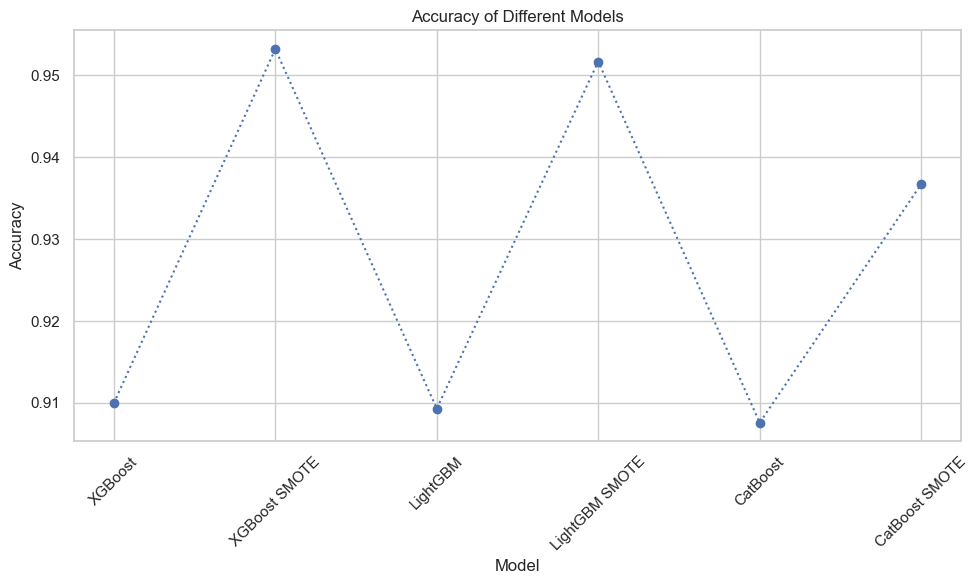

In [50]:
import matplotlib.pyplot as plt

# Model names
model_names = ['XGBoost', 'XGBoost SMOTE', 'LightGBM', 'LightGBM SMOTE', 'CatBoost', 'CatBoost SMOTE']

# Accuracy values
accuracy_values = [accuracy_xgb, accuracy_xgb_smote, accuracy_lgbm, accuracy_lgbm_smote, accuracy_catboost, accuracy_catboost_smote]

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracy_values, marker='o', linestyle=':')
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


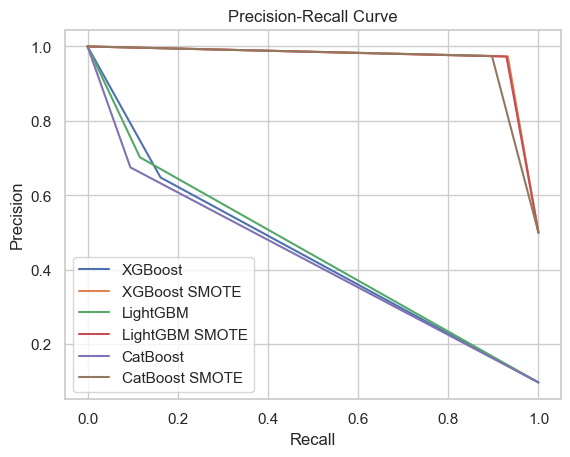

In [52]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Define function to plot precision-recall curve
def plot_precision_recall_curve(y_true, y_scores, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    plt.plot(recall, precision, label=model_name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()

# Plot precision-recall curves for all six models
plot_precision_recall_curve(y_test, y_pred_xgb, 'XGBoost')
plot_precision_recall_curve(y_test_smote, y_pred_xgb_smote, 'XGBoost SMOTE')
plot_precision_recall_curve(y_test, y_pred_lgbm, 'LightGBM')
plot_precision_recall_curve(y_test_smote, y_pred_lgbm_smote, 'LightGBM SMOTE')
plot_precision_recall_curve(y_test, y_pred_catboost, 'CatBoost')
plot_precision_recall_curve(y_test_smote, y_pred_catboost_smote, 'CatBoost SMOTE')

# Show the plot
plt.show()

In [53]:
from sklearn.metrics import average_precision_score

# Calculate area under the precision-recall curve for each model
auc_pr_xgb = average_precision_score(y_test, y_pred_xgb)
auc_pr_xgb_smote = average_precision_score(y_test_smote, y_pred_xgb_smote)
auc_pr_lgbm = average_precision_score(y_test, y_pred_lgbm)
auc_pr_lgbm_smote = average_precision_score(y_test_smote, y_pred_lgbm_smote)
auc_pr_catboost = average_precision_score(y_test, y_pred_catboost)
auc_pr_catboost_smote = average_precision_score(y_test_smote, y_pred_catboost_smote)

# Print the AUC-PR values for each model
print("AUC-PR for XGBoost:", auc_pr_xgb)
print("AUC-PR for XGBoost SMOTE:", auc_pr_xgb_smote)
print("AUC-PR for LightGBM:", auc_pr_lgbm)
print("AUC-PR for LightGBM SMOTE:", auc_pr_lgbm_smote)
print("AUC-PR for CatBoost:", auc_pr_catboost)
print("AUC-PR for CatBoost SMOTE:", auc_pr_catboost_smote)


AUC-PR for XGBoost: 0.18639055704889992
AUC-PR for XGBoost SMOTE: 0.9409257915989299
AUC-PR for LightGBM: 0.16748532466442972
AUC-PR for LightGBM SMOTE: 0.9394096860062247
AUC-PR for CatBoost: 0.15212599174788638
AUC-PR for CatBoost SMOTE: 0.9254579496453109


In [55]:
# Define a function to calculate True Positive Rate (TPR)
def calculate_tpr(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    fn = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # True Positive Rate
    return tpr

# Calculate TPR for each model
tpr_values = [calculate_tpr(y_test, y_pred_xgb), calculate_tpr(y_test_smote, y_pred_xgb_smote),
              calculate_tpr(y_test, y_pred_lgbm), calculate_tpr(y_test_smote, y_pred_lgbm_smote),
              calculate_tpr(y_test, y_pred_catboost), calculate_tpr(y_test_smote, y_pred_catboost_smote)]

# Print TPR values
for model, tpr in zip(model_names, tpr_values):
    print(f"{model}: TPR = {tpr}")


XGBoost: TPR = 0.1619718309859155
XGBoost SMOTE: TPR = 0.9320940819423369
LightGBM: TPR = 0.11619718309859155
LightGBM SMOTE: TPR = 0.9290591805766313
CatBoost: TPR = 0.09507042253521127
CatBoost SMOTE: TPR = 0.8968133535660091


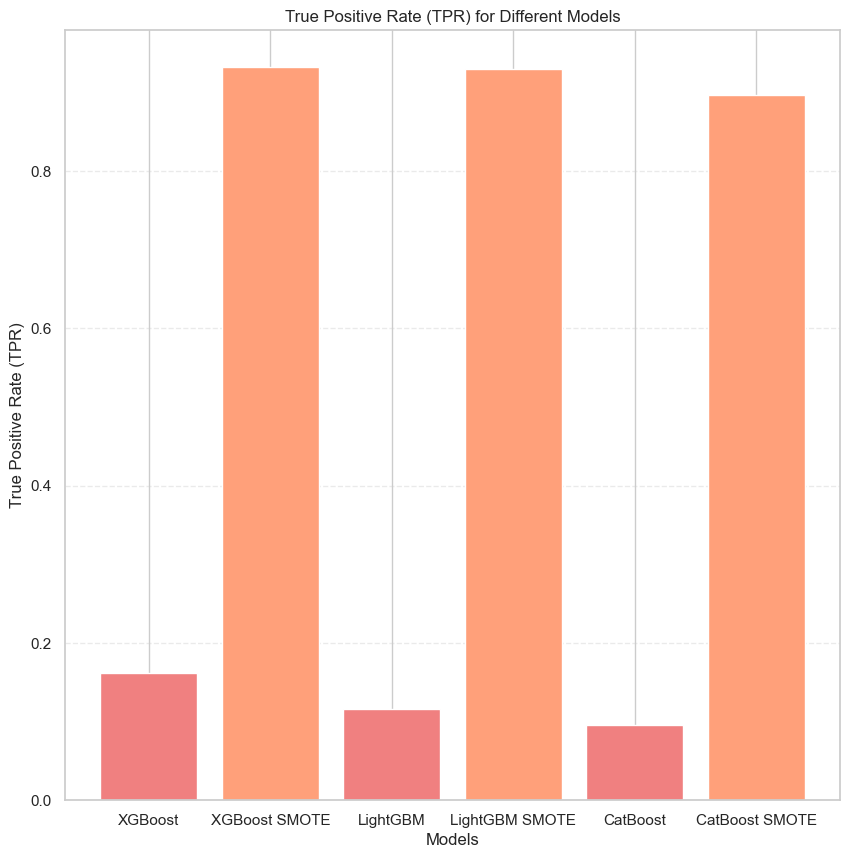

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Generate colors
colors = ['lightcoral', 'lightsalmon', 'lightcoral', 'lightsalmon', 'lightcoral', 'lightsalmon']

# Plot TPR values vertically with alternating colors
plt.figure(figsize=(10, 10))
plt.bar(model_names, tpr_values, color=colors)
plt.xlabel('Models')
plt.ylabel('True Positive Rate (TPR)')
plt.title('True Positive Rate (TPR) for Different Models')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()


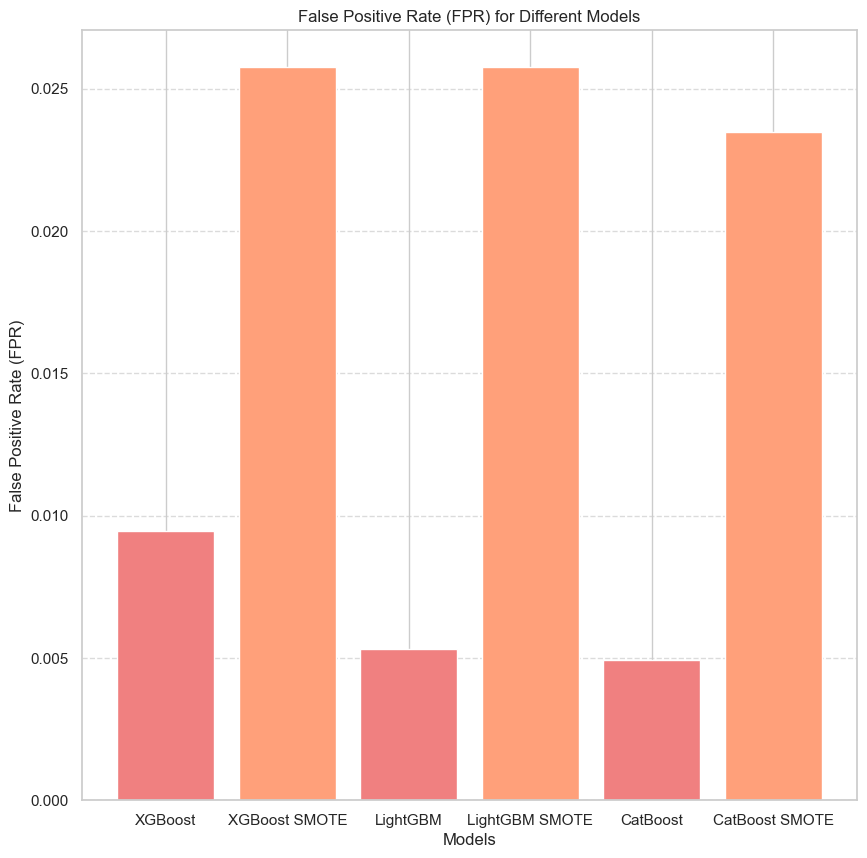

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Generate colors
colors = ['lightcoral', 'lightsalmon', 'lightcoral', 'lightsalmon', 'lightcoral', 'lightsalmon']

# Plot FPR values vertically with alternating colors
plt.figure(figsize=(10, 10))
plt.bar(model_names, fpr_values, color=colors)
plt.xlabel('Models')
plt.ylabel('False Positive Rate (FPR)')
plt.title('False Positive Rate (FPR) for Different Models')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [67]:
# Print FPR values
for model, fpr in zip(model_names, fpr_values):
    print(f"{model}: {fpr}")


XGBoost: 0.009476876421531463
XGBoost SMOTE: 0.025767336112163697
LightGBM: 0.00530705079605762
LightGBM SMOTE: 0.025767336112163697
CatBoost: 0.004927975739196361
CatBoost SMOTE: 0.023493747631678667
